1st step collecting data 

In [1]:
import pandas as pd 
train = pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

2nd step Exploratory data analysis 

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## survives 0= died, 1 =alive 
## Pclass, 1= first class, 2= second class, 3= third class 
##Sibsp , sib = sibling, sp = spouse , 0= you don't have children or spouse 
## Parch, pa= parents and ch = children 
## Embarked : Port of embarkment , S= southampton  and C=cherbourg, Q= Queenstown  


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Lets check the missing value 

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:

test.shape

(418, 11)

In [11]:
train.shape

(891, 12)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seanborn for plots

Bar chart for categorical features

In [13]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

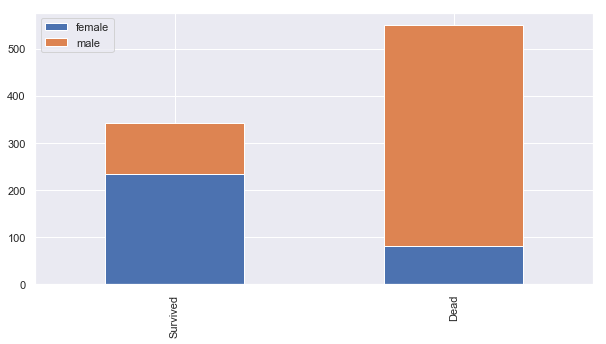

In [14]:
bar_chart('Sex')

In [15]:
### women survived more than women ....

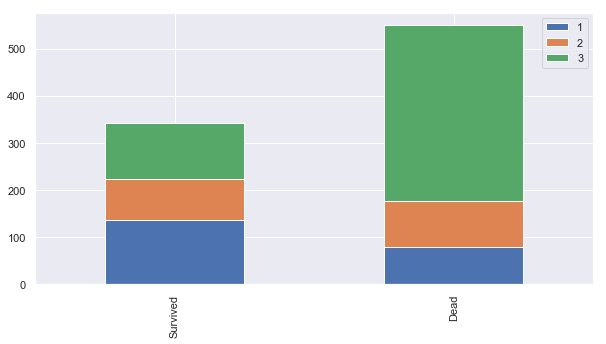

In [16]:
bar_chart('Pclass')

In [17]:
##Class 3 passengers died more among rest class  / class 1 survived more 

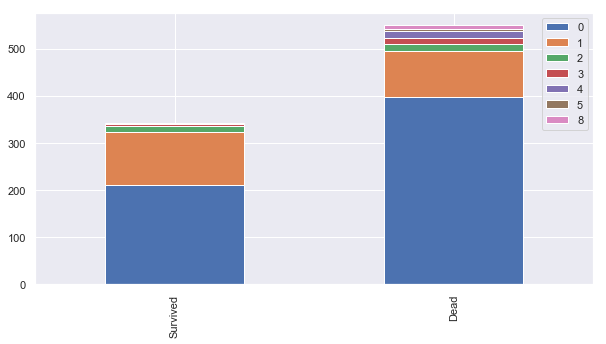

In [18]:
bar_chart('SibSp')

In [19]:
## people with no siblings or spouse died more on titanic 

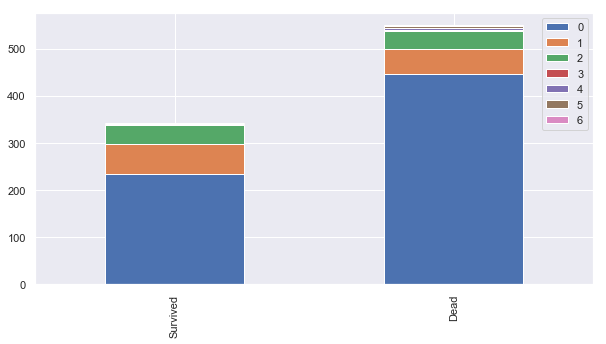

In [20]:
bar_chart('Parch')

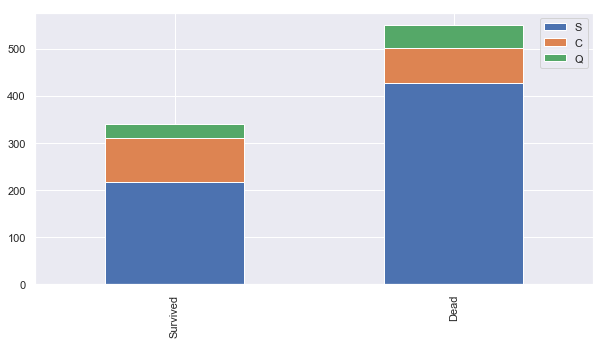

In [21]:
bar_chart('Embarked')

In [22]:
### people from  S embarkment  survived more ..

Feature Engneering 

In [23]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Name

In [24]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [25]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Lady          1
Sir           1
Jonkheer      1
Ms            1
Mme           1
Capt          1
Countess      1
Name: Title, dtype: int64

In [26]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

## Title mapping 
Mr:0
Miss:1
Mrs:2 
Others:3        

In [27]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


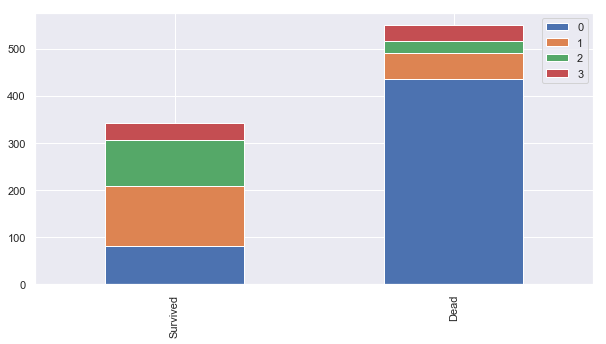

In [30]:
bar_chart('Title')

In [31]:
# delete unnecessary feature from dataset
train.drop('Name',axis=1, inplace= True)
test.drop('Name', axis=1, inplace= True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [33]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


Sex
Male:0, Female:1

In [34]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

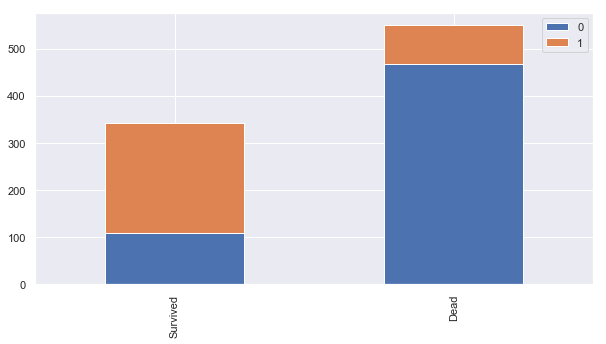

In [35]:
bar_chart('Sex')

In [36]:
## now lets look at the age column 
## some age field is missing 

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [38]:
## filling the missing values with median of age for each title(mr, mrs, miss, others)

In [39]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [40]:
train.head(10)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


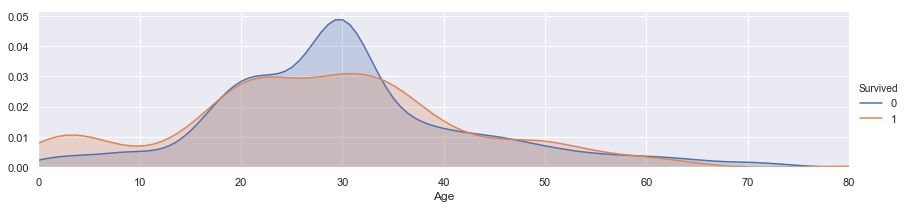

In [42]:
facet= sns.FacetGrid(train, hue='Survived',aspect= 4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

In [43]:
### we see that people between age of 30-40 died more ...less chance for survival 

In [44]:
### filling the missing value for Embarked table 

In [45]:
train.head(0)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


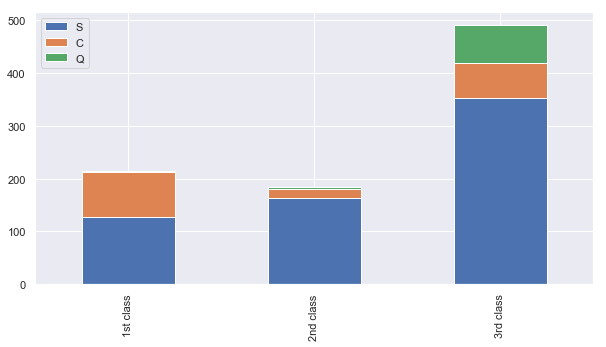

In [46]:
Pclass1 =train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 =train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 =train[train['Pclass']==3]['Embarked'].value_counts()
df= pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar',stacked =True, figsize=(10,5))

In [47]:
## More than 50% of the  1st class are from S embarkment  
## more than 50% of the 2nd class are from S embarkment 
## more than 50% of the 3rd class are from S embarkment 

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


### filling out the missing value of embarkment 

In [49]:
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].fillna('S')

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [51]:
embarked_mapping= {"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].map(embarked_mapping)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


Fare

In [53]:
## filling missing fare with median fare of each P class

In [54]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform ("median"),inplace= True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace= True)

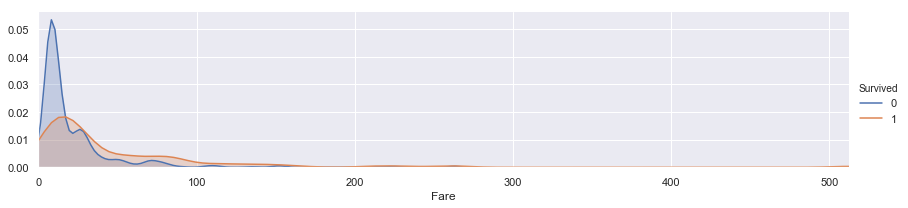

In [55]:
facet= sns.FacetGrid(train, hue="Survived",aspect =4)
facet.map(sns.kdeplot, 'Fare',shade= True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.show()

(0, 20)

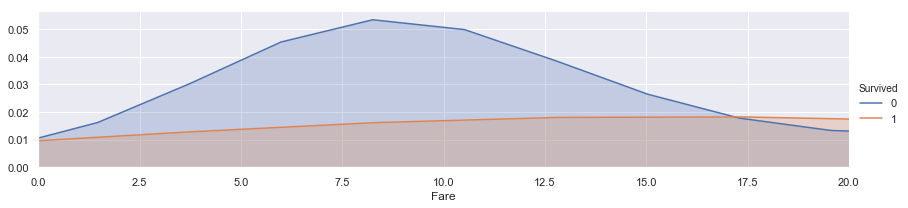

In [56]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

In [57]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, 'Fare']=0,
    dataset.loc[(dataset['Fare']>17) &(dataset['Fare']<=30), 'Fare']=1,
    dataset.loc[(dataset['Fare']>30)& (dataset['Fare']<=100),'Fare']=2,
    dataset.loc[dataset['Fare']>100, 'Fare']=3

In [58]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,35.0,0,0,373450,0.0,NaN,0,0


In [59]:
train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
C22 C26            3
F33                3
E101               3
D                  3
F2                 3
C83                2
D17                2
E8                 2
B35                2
D35                2
E121               2
B57 B59 B63 B66    2
D26                2
C124               2
C52                2
B49                2
F4                 2
B51 B53 B55        2
E33                2
B77                2
E67                2
C68                2
D36                2
B28                2
C78                2
D33                2
E44                2
                  ..
A26                1
A14                1
C54                1
F E69              1
A36                1
D10 D12            1
C32                1
F G63              1
B50                1
B86                1
B73                1
D21                1
B3                 1
C90                1
A10                1
A6                 1
B19          

In [60]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

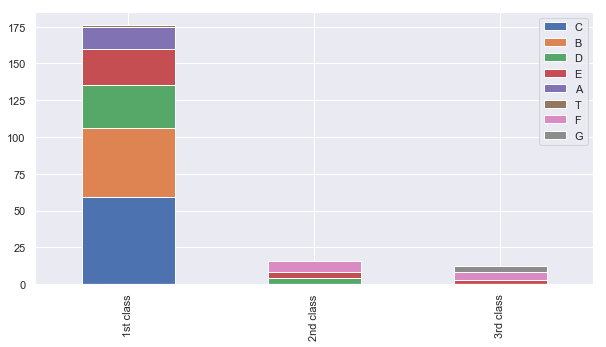

In [61]:
Pclass1= train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2= train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3= train[train['Pclass']==3]['Cabin'].value_counts()
df= pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked= True, figsize=(10,5))

In [62]:
cabin_mapping={"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6, "F":2.0,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin']= dataset['Cabin'].map(cabin_mapping)

In [63]:
## filling missing values for Cabin column
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform('median'), inplace= True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform('median'),inplace = True)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,35.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,35.0,0,0,373450,0.0,2.0,0,0


In [65]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,0.0,2.0,2,0
1,893,3,1,47.0,1,0,363272,0.0,2.0,0,2
2,894,2,0,62.0,0,0,240276,0.0,2.0,2,0
3,895,3,0,27.0,0,0,315154,0.0,2.0,0,0
4,896,3,1,22.0,1,1,3101298,0.0,2.0,0,2


### Family size

In [66]:
train["familysize"]=train["SibSp"]+train["Parch"]+1
test["familysize"]=train["SibSp"]+train["Parch"]+1

(0, 11.0)

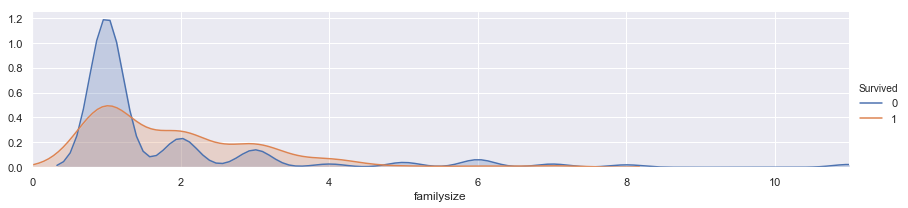

In [67]:
facet=sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'familysize', shade=True)
facet.set(xlim=(0,train['familysize'].max()))
facet.add_legend()
plt.xlim(0)

(0, 2)

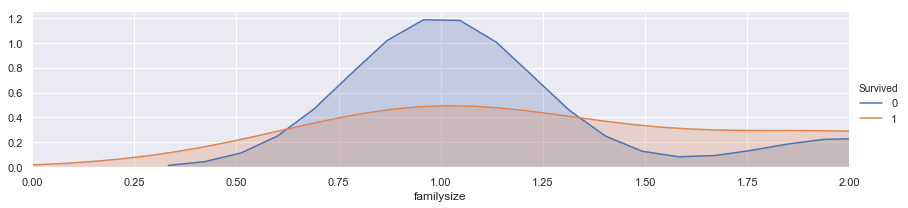

In [68]:
facet=sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'familysize', shade=True)
facet.set(xlim=(0,train['familysize'].max()))
facet.add_legend()
plt.xlim(0,2)

In [69]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['familysize'] = dataset['familysize'].map(family_mapping)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familysize
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,38.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,35.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,35.0,0,0,373450,0.0,2.0,0,0,0.0


In [71]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [72]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [73]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,familysize
0,3,0,22.0,0.0,2.0,0,0,0.4
1,1,1,38.0,2.0,0.8,1,2,0.4
2,3,1,26.0,0.0,2.0,0,1,0.0
3,1,1,35.0,2.0,0.8,0,2,0.4
4,3,0,35.0,0.0,2.0,0,0,0.0
5,3,0,30.0,0.0,2.0,2,0,0.0
6,1,0,54.0,2.0,1.6,0,0,0.0
7,3,0,2.0,1.0,2.0,0,3,1.6
8,3,1,27.0,0.0,2.0,0,2,0.8
9,2,1,14.0,2.0,1.8,1,2,0.4


### modeling 

In [74]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np 

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
familysize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


 Cross Validation (K-fold)
 


In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [77]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.82022472 0.7752809  0.66292135 0.79775281 0.78651685
 0.7752809  0.82022472 0.78651685 0.76404494]


In [78]:
##knn score
round(np.mean(score)*100,2)

77.44

In [79]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
## DecisionTreeClassifier
round(np.mean(score)*100, 2)

[0.73333333 0.84269663 0.73033708 0.82022472 0.82022472 0.80898876
 0.79775281 0.79775281 0.82022472 0.76404494]


79.36

In [80]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# Random Forest Score
round(np.mean(score)*100, 2)

[0.77777778 0.82022472 0.78651685 0.78651685 0.82022472 0.80898876
 0.80898876 0.7752809  0.80898876 0.7752809 ]


79.69

In [81]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

##Naive Bayes Score
round(np.mean(score)*100, 2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78

In [82]:
clf = SVC(gamma='auto')

scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

## SVC

round(np.mean(score)*100,2)

[0.77777778 0.7752809  0.84269663 0.74157303 0.82022472 0.83146067
 0.83146067 0.82022472 0.7752809  0.82022472]


80.36

Testing 

In [83]:
clf=SVC(gamma='auto')
clf.fit(train_data, target)
test_data= test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

In [84]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [86]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
